Steps to perform:
Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:
	
1.     Feature Transformation

●	Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

●	You will check the correlation between features and will drop those features which have a strong correlation
●	This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

●	After applying EDA and feature engineering, you are now ready to build the predictive models
●	In this part, you will create a deep learning model using Keras with Tensorflow backend


In [1]:
# import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('all lib imported')

all lib imported


In [2]:
# import loan data
data=pd.read_csv('loan_data.csv')

In [3]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

# Exploratory data analysis of different factors of the dataset.

<AxesSubplot: >

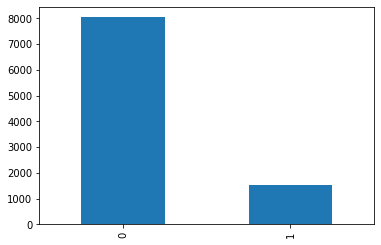

In [6]:
data['not.fully.paid'].value_counts().plot(kind='bar')

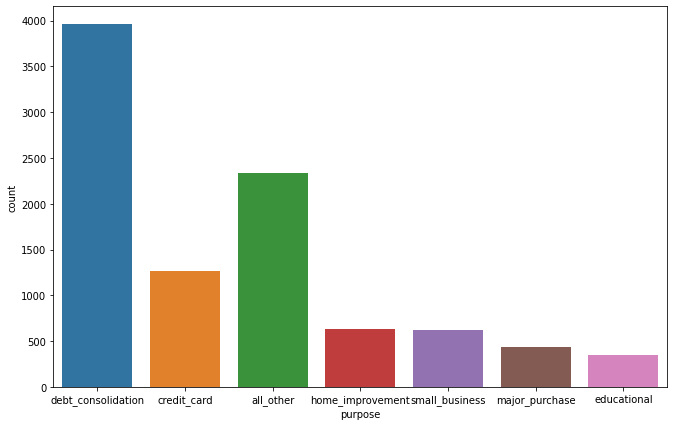

In [8]:
# purpose
plt.figure(figsize=(11,7))
sns.countplot(x=data['purpose'])
plt.show()

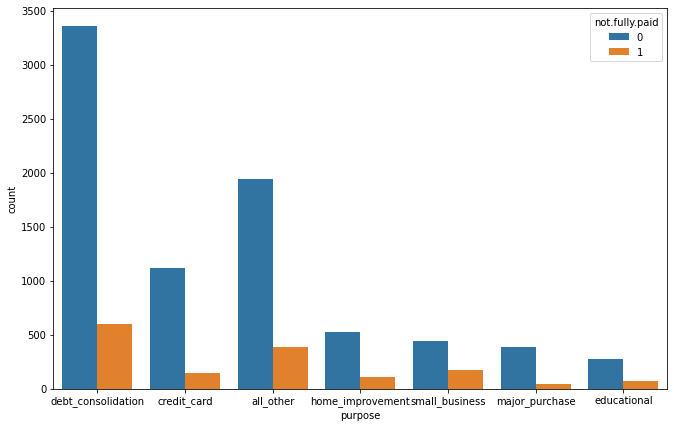

In [9]:
# purpose
plt.figure(figsize=(11,7))
sns.countplot(x=data['purpose'],hue='not.fully.paid',data=data)
plt.show()

# handle imbalanced data


In [10]:
not_fully_paid_0=data[data['not.fully.paid']==0]
not_fully_paid_1=data[data['not.fully.paid']==1]

In [11]:
not_fully_paid_0.shape

(8045, 14)

In [12]:
not_fully_paid_1.shape

(1533, 14)

In [14]:
# resample
from sklearn.utils import resample
minor_upsample=resample(not_fully_paid_1,replace=True,n_samples=8045)
new_df=pd.concat([not_fully_paid_0,minor_upsample])

# shuffle
from sklearn.utils import shuffle
new_df=shuffle(new_df)

# Feture Transformation

In [17]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [18]:
# apply encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [20]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
5865,1,0,0.1148,164.85,10.308953,16.40,782,5910.041667,1149,23.9,0,0,0,0
2529,1,2,0.1474,189.96,10.195560,21.33,672,3450.000000,12041,59.3,3,0,0,0
8685,0,2,0.0976,96.47,9.472397,5.45,702,660.000000,1470,21.6,0,0,0,1
3519,1,0,0.1284,235.33,9.574983,3.00,707,1199.958333,3449,19.7,2,0,0,1
5515,1,2,0.1635,556.44,10.778956,18.13,717,1620.000000,5481,99.7,0,0,0,0


In [21]:
new_df['purpose'].value_counts()

2    6482
0    3995
1    1872
6    1379
4    1110
5     636
3     616
Name: purpose, dtype: int64

# Feature Engineering

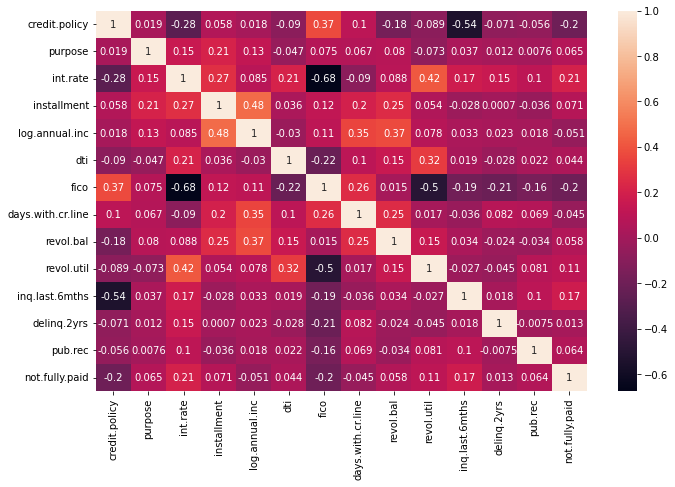

In [22]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [23]:
# see the corr
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.206792
fico                 0.201338
credit.policy        0.198442
inq.last.6mths       0.172397
revol.util           0.106243
installment          0.071208
purpose              0.065341
pub.rec              0.063913
revol.bal            0.058159
log.annual.inc       0.050997
days.with.cr.line    0.044979
dti                  0.043962
delinq.2yrs          0.012507
Name: not.fully.paid, dtype: float64

In [24]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [25]:
# prepare the data
X=new_df[['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
        'fico', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'pub.rec']]

In [26]:
X.shape

(16090, 10)

In [27]:
y=new_df[['not.fully.paid']]

In [28]:
# create train set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
# Apply standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
print('Imported')

Imported


In [31]:
# Create Architecture
# Create a ANN with 2 hidden layers, first hidden layer 19 units, second layer 10 neuron , activation relu,
# dropout .25, batchnormalization

In [45]:
# create architecture
# create ANN with 2 hidden layers, first hidden layer 19 neurons, second hidden layer 10 neurons, activation relu
# dropout 0.25, batchnormisation
model=Sequential()
# first hidden layer
model.add(Dense(19,activation='relu',input_shape=(10,)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
# second hidden layer
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
# third hidden layer
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

# output layer
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 19)                209       
                                                                 
 dropout_4 (Dropout)         (None, 19)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 19)                76        
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 10)                200       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_5 (Bat  (None, 10)                40        
 chNormalization)                                     

In [53]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [48]:
# Earlystopping
early_stop=EarlyStopping(monitor='val_loss',
                        min_delta=0.01,
                        mode='min',verbose=1,
                        patience=10)

In [49]:
history=model.fit(X_train,y_train,
                 epochs=50,
                 batch_size=256,
                validation_data=(X_test,y_test),
                  callbacks=[early_stop]
                 )

Epoch 1/50
51/51 [==============================] - 1s 5ms/step - loss: 0.8592 - accuracy: 0.5061 - val_loss: 0.6907 - val_accuracy: 0.5370
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 0.7672 - accuracy: 0.5239 - val_loss: 0.6763 - val_accuracy: 0.5674
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.7300 - accuracy: 0.5456 - val_loss: 0.6693 - val_accuracy: 0.5867
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.5569 - val_loss: 0.6655 - val_accuracy: 0.5904
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.5534 - val_loss: 0.6626 - val_accuracy: 0.5879
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5594 - val_loss: 0.6605 - val_accuracy: 0.5889
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5567 - val_loss: 0.6581 - val_accuracy: 0.5935
Epoch 8/50
51/51 [==

In [54]:
history=model.fit(X_train,y_train,
                 epochs=50,
                 batch_size=256,
                validation_data=(X_test,y_test),
                
                 )

Epoch 1/50
51/51 [==============================] - 1s 5ms/step - loss: 0.6438 - accuracy: 0.6264 - val_loss: 0.6362 - val_accuracy: 0.6361
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6275 - val_loss: 0.6360 - val_accuracy: 0.6352
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6341 - val_loss: 0.6356 - val_accuracy: 0.6377
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6264 - val_loss: 0.6361 - val_accuracy: 0.6352
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6287 - val_loss: 0.6360 - val_accuracy: 0.6361
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6334 - val_loss: 0.6359 - val_accuracy: 0.6352
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6316 - val_loss: 0.6358 - val_accuracy: 0.6352
Epoch 8/50
51/51 [==

In [55]:
# print accuracy & loss
score=model.evaluate(X_test,y_test)

101/101 [==============================] - 0s 742us/step - loss: 0.6303 - accuracy: 0.6445


In [56]:
score=model.evaluate(X_train,y_train)

403/403 [==============================] - 0s 795us/step - loss: 0.6252 - accuracy: 0.6457


In [57]:
# predictions
pred=model.predict(X_test)
pred

101/101 [==============================] - 0s 728us/step


array([[0.63734937],
       [0.34512028],
       [0.52257425],
       ...,
       [0.4836382 ],
       [0.40667808],
       [0.4968209 ]], dtype=float32)

In [59]:
predict=(pred>0.5).astype('int')
predict

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predict))

[[1098  536]
 [ 608  976]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))